In [ ]:
#  회사명을 입력을 하면, 
#  회사명을 기준으로 간단한 정보출력
#  회사에 근무하신 직원들의 평균적인 월급여 추정액, 연봉추정액, 가입자 수 출력

#  동종 업종 대비 평균 연봉의 차이
#  동종 업계는 얼마 정도 받느지 출력.


https://www.data.go.kr/data/15083277/fileData.do

# 국민연금 가입자 조회

In [18]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:.1f}'.format)
pd.set_option('display.max_columns', None)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False  


DATA_DIR = r'D:\Lang2505\dataset'

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, r'national-pension.csv'), encoding='cp949')
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2025-05,대신정보통신(주),133850,1,08500,서울특별시 금천구 가산동,서울특별시 금천구 가산디지털2로,1154510100,1154551000,11,545,101,1,722000,응용 소프트웨어 개발 및 공급업,1988-01-01,NaN,NaN,623,208751760,13,13
1,2025-05,(주)장성,214815,1,13511,경기도 성남시 분당구 야탑동,경기도 성남시 분당구 판교로,4113510700,4113561000,41,135,107,1,172902,그 외 기타 분류 안된 섬유제품 제조업,1988-01-01,NaN,NaN,3,1193660,0,0
2,2025-05,서울명지초등학교,111820,1,03656,서울특별시 서대문구 홍은동,서울특별시 서대문구 명지2길,1141011800,1141068000,11,410,118,1,999999,BIZ_NO미존재사업장,1988-01-01,NaN,NaN,32,6715440,1,0
3,2025-05,세종실업(주),114810,1,06339,서울특별시 강남구 일원동,서울특별시 강남구 개포로140길,1168011400,1168073000,11,680,114,1,452111,시설물 유지관리 공사업,1988-01-01,NaN,NaN,17,4549580,1,1
4,2025-05,(주)경농,214810,1,06627,서울특별시 서초구 서초동,서울특별시 서초구 효령로77길,1165010800,1165051000,11,650,108,1,242102,화학 살균ㆍ살충제 및 농업용 약제 제조업,1988-01-01,NaN,NaN,363,146396600,4,3




|                          변경 전 | 변경 후                 |
| -------------------------------: | ----------------------- |
|                     자료생성년월 | **삭제**                |
|                         사업장명 | 사업장명                |
|                   사업자등록번호 | 사업자등록번호          |
| 사업장가입상태코드 1 등록 2 탈퇴 | 가입상태                |
|                         우편번호 | **우편번호**            |
|               사업장지번상세주소 | **삭제**                |
|             사업장도로명상세주소 | 주소                    |
|               고객법정동주소코드 | **삭제**                |
|               고객행정동주소코드 | **삭제**                |
|           법정동주소광역시도코드 | 시도코드                |
|       법정동주소광역시시군구코드 | 시군구코드              |
| 법정동주소광역시시군구읍면동코드 | 읍면동코드              |
| 사업장형태구분코드 1 법인 2 개인 | **삭제**                |
|                   사업장업종코드 | 업종코드                |
|                 사업장업종코드명 | 업종코드명              |
|                         적용일자 | **삭제**                |
|                       재등록일자 | **삭제**                |
|                         탈퇴일자 | 탈퇴일자                |
|                         가입자수 | 가입자수                |
|                     당월고지금액 | 금액                    |
|                     신규취득자수 | 신규                    |
|                     상실가입자수 | 상실                    |



In [3]:
# 코드를 입력해 주세요
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호',
    '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드', 
    '시도코드', '시군구코드', '읍면동코드', 
    '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', 
    '적용일자', '재등록일자', '탈퇴일자',
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,대신정보통신(주),133850,1,서울특별시 금천구 가산디지털2로,11,545,101,722000,응용 소프트웨어 개발 및 공급업,NaN,623,208751760,13,13
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1193660,0,0
2,서울명지초등학교,111820,1,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,NaN,32,6715440,1,0
3,세종실업(주),114810,1,서울특별시 강남구 개포로140길,11,680,114,452111,시설물 유지관리 공사업,NaN,17,4549580,1,1
4,(주)경농,214810,1,서울특별시 서초구 효령로77길,11,650,108,242102,화학 살균ㆍ살충제 및 농업용 약제 제조업,NaN,363,146396600,4,3


# 사업장명 클린징

In [4]:
df.loc[df['사업장명'].str.contains('\(주\)')].head()  # (주) 가 들어간 사업장명

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,대신정보통신(주),133850,1,서울특별시 금천구 가산디지털2로,11,545,101,722000,응용 소프트웨어 개발 및 공급업,NaN,623,208751760,13,13
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1193660,0,0
3,세종실업(주),114810,1,서울특별시 강남구 개포로140길,11,680,114,452111,시설물 유지관리 공사업,NaN,17,4549580,1,1
4,(주)경농,214810,1,서울특별시 서초구 효령로77길,11,650,108,242102,화학 살균ㆍ살충제 및 농업용 약제 제조업,NaN,363,146396600,4,3
5,(주)니프코코리아,211814,1,충청남도 아산시 둔포면 아산밸리남로,44,200,360,252901,포장용 플라스틱 성형용기 제조업,NaN,616,331728060,1,2


In [5]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '우성기전(주)')

'우성기전'

In [6]:
df.loc[df['사업장명'].str.contains('\[')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
103132,에스티테크[주],606817,1,부산광역시 사하구 감천항로419번길,26,380,107,291502,기타 물품 취급장비 제조업,NaN,11,4336240,1,0
147466,게스트하우스 [특별자활],206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,15,2109420,2,4
147825,[주)한빛관리 은행대우 3차1단지/ 생활지원센타],212813,1,경기도 시흥시 은행로,41,390,106,702003,비주거용 부동산 관리업,NaN,4,1108520,0,0
153334,비전트레이닝센터[자활사업],206826,1,서울특별시 성동구 자동차시장길,11,200,122,999999,BIZ_NO미존재사업장,NaN,16,1209920,3,0
169217,바이오코리아[BIOKOREA],317826,1,충청북도 청주시 흥덕구 오송읍 오송생명2로,43,113,250,999999,BIZ_NO미존재사업장,NaN,3,671020,0,0


In [7]:
# (예시) 에스티테크[주]에서 [주]를 삭제 하고 싶은 경우
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

In [8]:
df.loc[df['사업장명'].str.contains('\/')].head(10)

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
988,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,293,142649660,1,0
1900,재우교통/주,205812,1,서울특별시 마포구 가양대로,11,440,127,602201,택시 운송업,NaN,3,823400,0,0
4566,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
16905,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,200,49658560,1,5
19800,사)강원도지체장애인협회고성군지회/장애인종합상담실/편의,227826,1,강원특별자치도 고성군 간성읍 간성로30번길,51,820,250,999999,BIZ_NO미존재사업장,NaN,3,918520,0,0
20933,안산시청(의료급여사례관리/통합돌봄과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,5,1511800,0,0
23701,전용부품판매/주,204817,1,서울특별시 동대문구 전농로4길,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,3,983700,0,0
25111,민현건설(주)/본사,507810,1,대전광역시 서구 대덕대로,30,170,113,452102,유리 및 창호 공사업,NaN,3,376360,0,0
25807,중앙산업(자)/생활폐기물 수집운반 대행사업,138810,1,경기도 의왕시 부곡중앙북9길,41,430,103,900100,지정 외 폐기물 수집 운반업,NaN,9,2716900,0,0
26821,주/원성오토,204817,1,서울특별시 동대문구 한천로,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,4,1428460,0,0


In [9]:
# 그 밖의 모든 특수문자는 제거합니다. (제거한 특수문자에는 공백을 삽입합니다)
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [13]:
# 검증코드 (변경전)
df.loc[[19800, 147466, 24109, 23092, 54842]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
19800,사)강원도지체장애인협회고성군지회/장애인종합상담실/편의,227826,1,강원특별자치도 고성군 간성읍 간성로30번길,51,820,250,999999,BIZ_NO미존재사업장,NaN,3,918520,0,0
147466,게스트하우스 [특별자활],206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,15,2109420,2,4
24109,(주)창남아이엔티,116813,1,서울특별시 영등포구 당산로,11,560,111,749927,섬유 의복 신발 및 가죽제품 중개업 / 목재 및 건축,NaN,78,36822800,1,2
23092,(주)씨제이전설,303813,1,충청북도 충주시 금가면 김생로,43,130,390,452104,배관 및 냉ㆍ난방 공사업,NaN,5,1377780,0,0
54842,(주)모티브,134862,1,경기도 안산시 단원구 해봉로,41,273,103,343000,그 외 자동차용 신품 부품 제조업,NaN,22,5346940,1,0


In [14]:
# 위의 제공된 힌트를 참고하여 사업장명 컬럼에 대하여 다음 조건의 클린징을 적용

# (주) 와 같은 문자열은 ()안에 문자를 포함하여 일괄 제거합니다.
# [주식회사]와 같이 [] 안에 문자열 포함하여 일괄 제거합니다.
# 숫자, 한글, 영어를 제외한 특수문자는 공백으로 대체 합니다. 만약 공백이 1개 이상이 들어간 경우는 1개로 대체합니다.

def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [15]:
# 검증코드 (변경후)
df.loc[[19800, 147466, 24109, 23092, 54842]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
19800,사 강원도지체장애인협회고성군지회 장애인종합상담실 편의,227826,1,강원특별자치도 고성군 간성읍 간성로30번길,51,820,250,999999,BIZ_NO미존재사업장,NaN,3,918520,0,0
147466,게스트하우스,206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,15,2109420,2,4
24109,창남아이엔티,116813,1,서울특별시 영등포구 당산로,11,560,111,749927,섬유 의복 신발 및 가죽제품 중개업 / 목재 및 건축,NaN,78,36822800,1,2
23092,씨제이전설,303813,1,충청북도 충주시 금가면 김생로,43,130,390,452104,배관 및 냉ㆍ난방 공사업,NaN,5,1377780,0,0
54842,모티브,134862,1,경기도 안산시 단원구 해봉로,41,273,103,343000,그 외 자동차용 신품 부품 제조업,NaN,22,5346940,1,0


# 분석
2023년에 탈퇴한 기업의 월별 탈퇴수를 bar 그래프로 출력 

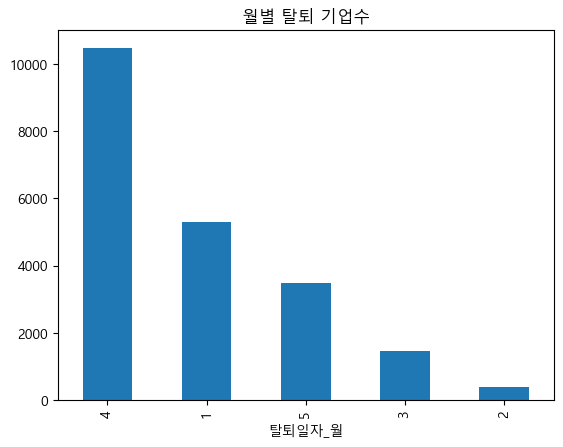

In [20]:
# 코드를 입력해 주세요
df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2025), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()


In [21]:
# 코드를 입력해 주세요
df['시도'] = df['주소'].str.split(' ').str[0]
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2025) & (df['시도'].apply(lambda x: len(x.strip())) > 0), '시도'].value_counts().plot(kind='bar')
plt.title('시도별 탈퇴 기업 수')
plt.xticks(rotation=60)
plt.show()

AttributeError: 'float' object has no attribute 'strip'

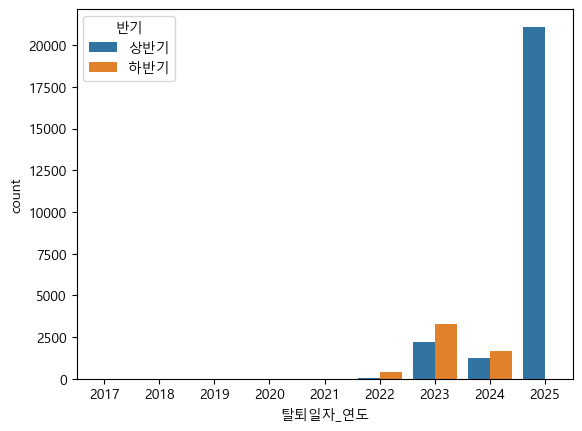

In [22]:
# 탈퇴한 기업을 대상으로 상반기 / 하반기별 기업의 탈퇴 수를 비교합니다.
# 비교대상은 2017년 ~ 2021년을 기준으로 산정합니다.

# 코드를 입력해 주세요
cond1 = (df['가입상태'] == 2) & (df['탈퇴일자_연도'] >= 2017) & (df['탈퇴일자_연도'] <= 2025)
tmp = df.loc[cond1].copy()
tmp['반기'] = np.where(tmp['탈퇴일자_월'] <= 6, '상반기', '하반기')
tmp['탈퇴일자_연도'] = tmp['탈퇴일자_연도'].astype('int')
sns.countplot(x='탈퇴일자_연도', hue='반기', data=tmp)
df = df.drop(['탈퇴일자_연도', '탈퇴일자_월','시도'], axis=1)
plt.show()

In [23]:
# 가입상태가 2인 데이터는 삭제 합니다.
# 가입상태, 탈퇴일자 컬럼을 제거하세요.

df = df.loc[df['가입상태'] == 1].drop(['가입상태', '탈퇴일자'], axis=1).reset_index(drop=True)
print(f'shape: {df.shape[0]} 행')
df.head()

shape: 512326 행


,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,대신정보통신,133850,서울특별시 금천구 가산디지털2로,11,545,101,722000,응용 소프트웨어 개발 및 공급업,623,208751760,13,13
1,장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1193660,0,0
2,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,32,6715440,1,0
3,세종실업,114810,서울특별시 강남구 개포로140길,11,680,114,452111,시설물 유지관리 공사업,17,4549580,1,1
4,경농,214810,서울특별시 서초구 효령로77길,11,650,108,242102,화학 살균ㆍ살충제 및 농업용 약제 제조업,363,146396600,4,3


# 핵심 데이터 column 추출

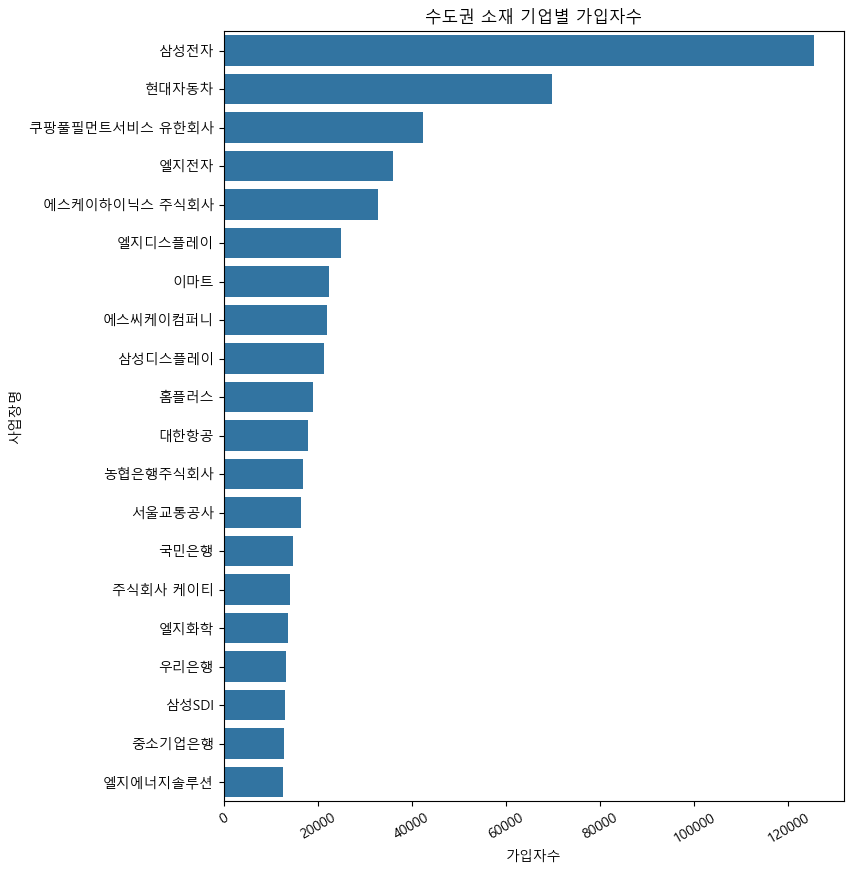

In [24]:
# 수도권(서울, 경기도) 소재의 기업을 대상으로 합니다.
# 가입자수를 기준으로 내림차순 정렬하여 bar 그래프를 출력합니다.
# 출력되는 사업장명은 상위 20개만 출력합니다.
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 소재 기업별 가입자수')
plt.show()

### 국민연금 납부액으로 기업별 평균 연봉 추정

국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 인당금액 = 금액 / 가입자수
- 월급여추정 = 인당금액 / 9% * 100%
- 연간급여추정 = 임직원 평균 월급 * 12개월

- 금액을 가입자수로 나눈 금액을 산출하여 `인당금액`을 먼저 산출합니다.
- `월급여추정`은 `인당금액` / 9% * 100% 한 값입니다.
- `월급여추정`을 x12한 값을 `연간급여추정`에 대입합니다.
- `가입자수` 기준 1000명을 초과하는 기업(중견기업)을 필터링 합니다.
- 출력시 `사업장명`, `가입자수`, `월급여추정`, `연간급여추정` 컬럼만 출력합니다.
- `연간급여추정`와 `가입자수`를 기준으로 내림차순하여 상위 10개 기업을 출력합니다.

In [25]:
# 코드를 입력해 주세요
df['인당금액'] = df['금액'] / df['가입자수']
df['월급여추정'] =  df['인당금액'] / 9 * 100
df['연간급여추정'] = df['월급여추정'] * 12

cond = (df['가입자수'] > 1000)
df.sort_values(['연간급여추정', '가입자수'], ascending=False).loc[cond, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].head(10)

,사업장명,가입자수,월급여추정,연간급여추정
5914,기아 영업본부,2102,6170000.0,74040000.0
6264,기아 정비본부,1151,6165526.2,73986314.5
3305,주식회사 현대케피코,1743,6160300.5,73923606.0
90636,현대제철포항1공장,1395,6160095.6,73921147.0
203250,부산항만산업협회 화물고정업,1111,6155585.8,73867029.1
84073,현대제철주식회사,1548,6124374.2,73492491.0
135218,현대위아,2877,6123633.7,73483604.7
179522,삼성디스플레이,21322,6123241.5,73478898.0
41214,현대제철주식회사당진공장,6684,6110076.0,73320912.4
244346,삼성물산건설부문 정규직,4630,6108019.5,73296234.4
